In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
frame = pd.read_csv('1.csv', header=None, sep=',')

In [3]:
frame

,0,1,2,3,4
0,-3.559408,1,6.490758,1.587476,0.009951
1,-9.077184,1,7.850516,0.827435,0.009930
2,30.869241,1,2.284262,8.049759,0.010058
3,0.106257,1,3.669403,1.108870,0.009974
4,22.341931,1,9.837528,9.758840,0.009999
5,6.015793,1,2.502938,1.976068,0.009995
6,-11.980174,1,7.676827,0.045813,0.009924
7,23.218360,1,2.289537,6.153489,0.010039
8,0.100527,1,9.173865,3.799071,0.009946
9,27.269879,1,6.980626,9.509448,0.010025


In [4]:
data = pd.DataFrame.as_matrix(frame)

Найдем оценку параметра $\theta$ методом наименьших квадратов:

In [5]:
z = data[:, 1:]
y = data[:, 0]
theta_est = np.linalg.inv(z.T.dot(z)).dot(z.T).dot(y)
print theta_est

[  3.98035920e+01  -2.03507682e+00   4.03605975e+00  -3.67138513e+03]


$det(Z^{T}Z)$:

In [6]:
np.linalg.det(z.T.dot(z))

0.66090295317101178

Заметим, что матрица $Z^{T}Z$ невырождена.

Рассмотрим оценку $\widehat{\theta} = (Z^{T}Z + \lambda I)^{-1}Z^{T}Y$

In [7]:
lambda_ = np.arange(0, 100, 0.1)
theta = np.empty((lambda_.size, data[:, 0].size, 4))
z1 = np.empty((data[:, 0].size - 1, 4))
for i in range(data[:, 0].size):
    for j in range(lambda_.size):
        z1 = np.delete(z, i, 0)
        y1 = np.delete(y, i, 0)
        theta[j][i] = np.linalg.inv(z1.T.dot(z1) + lambda_[j] *
                                    np.eye(4)).dot(z1.T).dot(y1)

In [12]:
theta

array([[[  4.08992564e+01,  -2.03616731e+00,   4.03714457e+00,
          -3.78094154e+03],
        [  1.92687409e+01,  -2.01461753e+00,   4.01562763e+00,
          -1.61793370e+03],
        [  1.99834800e+01,  -2.01521078e+00,   4.01618278e+00,
          -1.68938131e+03],
        ..., 
        [  6.51486104e+01,  -2.06039260e+00,   4.06141649e+00,
          -6.20591850e+03],
        [  5.07857676e+01,  -2.04605639e+00,   4.04706364e+00,
          -4.76961915e+03],
        [  4.38456993e+01,  -2.03912563e+00,   4.04010798e+00,
          -4.07559047e+03]],

       [[  3.08750268e+00,  -1.99815114e+00,   3.99946949e+00,
           3.09346194e-02],
        [  3.08709240e+00,  -1.99822906e+00,   3.99958325e+00,
           3.09307254e-02],
        [  3.08733340e+00,  -1.99810752e+00,   3.99942347e+00,
           3.09331262e-02],
        ..., 
        [  3.08713348e+00,  -1.99812937e+00,   3.99949061e+00,
           3.09306961e-02],
        [  3.08726815e+00,  -1.99815441e+00,   3.99950122e+0

Для каждого $\lambda$ найдем ошибку дисперсии:

In [8]:
var = np.empty((lambda_.size, 4))
for i in range(lambda_.size):
    var[i] = (theta[i]**2).mean(0) - (theta[i].mean(0))**2

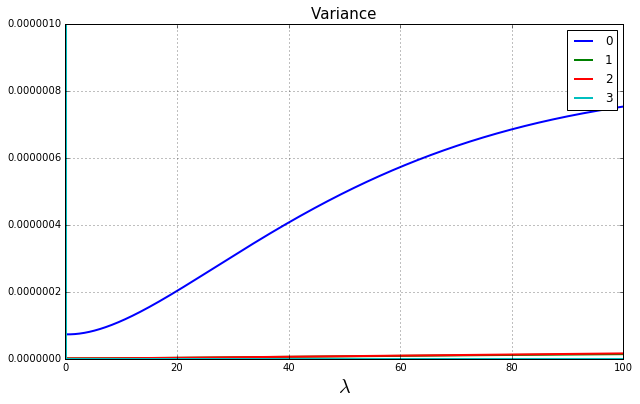

In [19]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(lambda_, var[:, i], linewidth = 2, label=str(i))
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 0.000001)
plt.xlabel(r'$\lambda$', fontsize = 20)
plt.title('Variance', fontsize = 15)
plt.grid() 
plt.show()

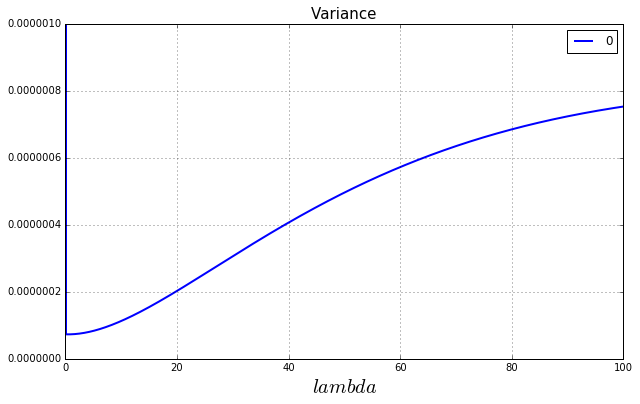

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_, var[:, 0], linewidth = 2, label=str(0))
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 0.000001)
plt.xlabel(r'$lambda$', fontsize = 20)
plt.title('Variance', fontsize = 15)
plt.grid() 
plt.show()

In [27]:
var

array([[  1.01110748e+02,   1.01099630e-04,   1.01077960e-04,
          1.01110487e+06],
       [  7.30693195e-08,   1.27052946e-09,   1.23581856e-09,
          7.27716769e-12],
       [  7.30353005e-08,   1.27086519e-09,   1.23531407e-09,
          7.28622750e-12],
       ..., 
       [  7.52744441e-07,   1.38503080e-08,   1.61028701e-08,
          7.52752891e-11],
       [  7.52996018e-07,   1.38615377e-08,   1.61183138e-08,
          7.53004465e-11],
       [  7.53246769e-07,   1.38727625e-08,   1.61336366e-08,
          7.53255239e-11]])

Из графиков видно, что при $\lambda$ стремящемся к 0, дисперсия уменьшается для каждой координаты, но при этом при $\lambda = 0$ дисперсия велика. Оптимальное $\lambda$ - близкое к 0, например, $\lambda = 1$.